### Github Analyzer

This notebook should have been deployed in Watson Studio
    **but** unfortunately Watson Studio doesn't support interactive notebooks yet

Git Repos to be investigated:

* https://github.ibm.com/wiotp/monitoring-dashboard
* https://github.ibm.com/wiotp/analytics-service


Influenced by IBM's Data and AI dev transformation group

<a href="https://github.ibm.com/DataandAI-dev-transformation/dev-transformation/blob/master/code-quality/defect_tracking.MD" target="_blank">DataandAI-dev-transformation - code quality defect tracking</a>

and more specifically the automatic component assigner for new defects [here](https://github.ibm.com/DataandAI-dev-transformation/defect_classification_ml_to_assign_component/blob/master/DefectClassifier_SGD_TFID_features-5.ipynb)

In [1]:
import csv
import requests
import collections
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import cm, table
from matplotlib.dates import MonthLocator, DateFormatter
from mpl_toolkits.mplot3d import axes3d

In [2]:
# custom functions - install with pip install git+https://github.com/sedgewickmm18/mmfunctions
from mmfunctions import gitanalyzer

In [3]:
# Repos and credentials to retrieve the data from
params = {}

#params['PROJECT'] = 'aivision'
#params['REPO'] = 'mldlppc/tracker'
#params['REPO_ID'] = 172152
#params['ZENHUB_WORKSPACE'] = '5a1e4aa0132a1305414225d6'

params['PROJECT'] = 'monitor'
params['REPO'] = 'wiotp/monitoring-dashboard'
params['REPO2'] = 'wiotp/analytics-service'
params['REPO_ID'] = 566611
params['REPO2_ID'] = 211664
params['ZENHUB_WORKSPACE'] = '5cd44ce4baded506ba8ddd5f'

params['GITHUB_TOKEN'] = 'ad7e5d3d34e79ac5d06210e74546c36b4bbc86ab'
params['ZENHUB_TOKEN'] = '814960f27921de182e39873816e4a54be9cdbb5000baa92d054e773949c1681e5e637c3bd30b54ad'

params['TRAVIS_TOKEN'] = '7B8mnG99oqNcHJgKKXMYVQ'
params['BASE_URL'] = 'https://github.ibm.com'
params['ZEN_BASE_URL'] = 'https://zenhub.ibm.com'
params['IGNORE_RELEASES'] = ['closed'] # valid parms: closed, rel names
params['GIT_PARAMS'] = {'is': 'issue', 'state': 'open'}

params['DELIMITER'] = '|'
params['JIRA'] = True

# map github id to intranet id
params['rsiva'] = 'rsiva@us.ibm.com'
params['KOHLMANN-de'] = 'kohlmann@de.ibm.com'
params['Stephen-M-Stone'] = 'Stephen.M.Stone@ibm.com'
params['markus-mueller'] = 'markus_mueller@de.ibm.com'
params['shraddha-singh'] = 'shraddha.singh@ibm.com'
params['Amritha-Herle'] = 'amritha.herle@ibm.com'
params['Joel-Armendariz'] = 'Joel.Armendariz@ibm.com'
params['scottsd'] = 'scottsd@us.ibm.com'
params['bboyd'] = 'bboyd@us.ibm.com'
params['jhaa'] = 'jhaa@us.ibm.com'
params['Anu Shaw'] = 'anu.shaw@de.ibm.com'
params['Ryan-Wolfe'] = 'scottsd@us.ibm.com'  # deactivated account

params['LUAIDEMP'] = 'LUAIDEMP@ie.ibm.com'
params['mats-gothe'] = 'mats.gothe@se.ibm.com'

params['UNKNOWN_USER'] = 'scottsd@us.ibm.com'

#params['cynthiaz'] = 
 
gitanalyzer.process_all(params)
# After extraction store the data in cloud object store

loading zenhub releases
loading zenhub issues per releases
Issue with  <Response [504]>
Issue with  <Response [504]>
loading zenhub issues by board
Process github repo 1
Process github repo 2


In [5]:
# upload stuff for later use to COS
!s3cmd --access_key "cc04444c99374c9e9589b8f85e931323" --secret_key "1a5062d937b09507a05b521a41b8baf6848c0cd6936e2864" \
--access_token "icny9QB770wS9p67JHCWb6C8ySJEn_3tmfjqct9qQhSY" --host s3.eu.cloud-object-storage.appdomain.cloud --host-bucket=s3.eu.cloud-object-storage.appdomain.cloud \
put monitoring-defects.csv s3://githubanalyzer-donotdelete-pr-b9xa3kxotzh5in

/home/markus/.local/bin/s3cmd:308: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if response["status"] is 200:
/home/markus/.local/bin/s3cmd:310: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif response["status"] is 204:

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    An unexpected error has occurred.
  Please try reproducing the error using
  the latest s3cmd code from the git master
  branch found at:
    https://github.com/s3tools/s3cmd
  and have a look at the known issues list:
    https://github.com/s3tools/s3cmd/wiki/Common-known-issues-and-their-solutions
  If the error persists, please report the
  following lines (removing any private
  info as necessary) to:
   s3tools-bugs@lists.sourceforge.net

Error loading some components of s3cmd (Import Error)
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Invoked as: /home/markus/.local/bin/s3cmd --access_key cc04444c99374c9e9589b8f85e931323 --secret_key 1a5062d937b09507a05b521a41b8baf6848c0cd6936e2864 --access_tok

In [5]:
# get it back from COS
!s3cmd --access_key "cc04444c99374c9e9589b8f85e931323" --secret_key "1a5062d937b09507a05b521a41b8baf6848c0cd6936e2864" \
--access_token "icny9QB770wS9p67JHCWb6C8ySJEn_3tmfjqct9qQhSY" --force --host s3.eu.cloud-object-storage.appdomain.cloud --host-bucket=s3.eu.cloud-object-storage.appdomain.cloud \
get s3://githubanalyzer-donotdelete-pr-b9xa3kxotzh5in/monitoring-defects.csv wiotp-monitoring-dashboard-defects.csv

download: 's3://githubanalyzer-donotdelete-pr-b9xa3kxotzh5in/monitoring-defects.csv' -> 'wiotp-monitoring-dashboard-defects.csv'  [1 of 1]
 745434 of 745434   100% in    2s   338.19 kB/s  done


#### Example Data

Issue data from github and zenhub combined

In [4]:
defects_df = pd.read_csv('./monitoring-defects.csv', delimiter='|', index_col='IssueNr') # parse_dates=['Created'])

## Remove the encoding prefix string
df=defects_df.replace('b\'','',regex=True).astype(object)
df=df.replace('b\"','',regex=True).astype(object)
df['Created'] = pd.to_datetime(df['Created'])
df['Updated'] = pd.to_datetime(df['Updated'])
df['Closed'] = pd.to_datetime(df['Closed'])

# average estimates for NaN
df['Estimate'] = df['Estimate'].fillna(2.69)
df['Release'] = df['Release'].fillna('')
df['Created'] = df['Created'].dt.round('1d')
df['Closed'] = df['Closed'].fillna(pd.Timestamp(gitanalyzer.FarFuture)).dt.round('1d')

# Strip off outdated stuff
df = df[df['Pipeline'] != 'To Be Closed']
df.head(1)

,Title,Repo,Created,Updated,Closed,Origin,Assignee,Status,Release,Milestone,...,Risk,Theme,Blocked,Pipeline,Label1,Label2,Label3,Label4,Label5,Labels
IssueNr,,,,,,,,,,,,,,,,,,,,,
15154,"Vision: After migration, 1.2.0 failing to star...",mldlppc/tracker,2020-06-24,2020-06-23 23:53:07,2030-01-01,ckime,ckime,open,Maximo Visual Inspection V1R3M0,Sprint 2020-9,...,2,NaN,NaN,In Progress,Engagement,Pri: 2 High,Type: bug,NaN,NaN,[]


In [5]:
# Retrieve release map
df_release = pd.read_csv('./monitoring-releases.csv')
ReleaseMap = df_release['Title'].reset_index()[['Title','index']].to_numpy().tolist()
ReleaseDateMap = df_release.to_numpy().tolist()
#ReleaseDateMap

#### Our journey 

This is obviously a large wish list and not all of the metrics are equally important

![image.png](./images/Ayoa.png)

In [6]:
# Assign some risks random risks
df['Risk'] = np.random.choice([1,2,3], df['Risk'].values.shape[0], p=[0.2, 0.3, 0.5])
#df['Title'] = df['Title'][:5]
#df.head(5)

In [7]:
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import Layout, Button, ToggleButton, Box, Dropdown, Text, Textarea
from ipywidgets import interact, interactive, fixed, interact_manual, interactive_output
from ipywidgets import Output

#w = widgets.IntSlider()
#display(w)

#### Split up issues by type and severity

In [8]:
df['Color'] = '#ffcc99'
#df[df['Type'] == 'Issue']['Color'] = '#ff9999'
#df[df['Type'] == 'Bug']['Color'] = '#66b3ff'
#df[df['Type'] == 'Epic']['Color'] = '#99ff99'

dfs = [df[df['Severity'] == 1], df[df['Severity'] == 2], df[df['Severity'] == 3], 
       df[df['Severity'] == 4], df]
dfssum = []

# prepare data
cnt = []
labels = []
explode = []
colors = []

for dfs_el in dfs:
    cnt_el = dfs_el.groupby('Type')['Title'].count()
    dfssum.append('Sum: ' + str(dfs_el.count()['Title']))
    labels.append(cnt_el.index)
    explode.append(np.zeros(cnt_el.size) + 0.02)
    #colors.append(cnt_el['Color'])
    cnt.append(cnt_el)
    
# define widget
box_layout = Layout(display='flex', flex_flow='row', align_items='stretch', border='solid', width='23%')
dropdown = Dropdown(
    options=[('sev1', 0), ('sev2', 1), ('sev3',2), ('sev4',3), ('sev 1 to 4', 4), ('all', 11)],
    value=11,
    description='Severity:',
)
box = Box(children=[dropdown], layout=box_layout)
    
def f(severity):
    if severity > 10:
        fig, ax = plt.subplots(1, 5, figsize=(20,6))
        for i in [0,1,2,3,4]:
            ax[i].pie(cnt[i], explode=explode[i], labels=labels[i], autopct='%1.1f%%',
                      shadow=True, startangle=90)
            if i < 4:
                ax[i].set_title('Monitoring issues by Type\n   Severity: ' + str(i + 1))

            else:
                ax[i].set_title('Monitoring issues by Type\n   All severities')
            ax[i].text(-1.1,1,dfssum[i],ha='center',va='center',fontsize=12, 
                       bbox=dict(facecolor='beige', alpha=0.5))
    else:
        fig1, ax1 = plt.subplots()
        ax1.pie(cnt[severity], explode=explode[severity], labels=labels[severity], autopct='%1.1f%%',
                shadow=True, startangle=90)
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        if severity < 4:
            ax1.set_title('Monitoring issues by Type\n   Severity: ' + str(severity + 1))
        else:
            ax1.set_title('Monitoring issues by Type\n   All severities')
        ax1.text(-1.1,1,dfssum[severity],ha='center',va='center',fontsize=12, 
                       bbox=dict(facecolor='beige', alpha=0.5))

ws = interactive_output(f, {'severity': dropdown});
display(box, ws)

Box(children=(Dropdown(description='Severity:', index=5, options=(('sev1', 0), ('sev2', 1), ('sev3', 2), ('sev…

Output()

### Velocities

- Overall Velocity
- Defect Velocity (**implemented** - starting mid 2019)
- Customer satisfaction (**no data** not included as we have no data)
- Defect breakdown by severity (**no data** we have no severities in our defects)
- Value per sprint (**no data** value of epics or stories is not known)
- Percentage of test case coverage (**no data** - we do not track that)
- Customer Support Requests (**no data*)
- Trends (let's define what trends we need)
- NPS (**no data**)
- Build failures (need to get Travis data)
- Deployment failures (Jenkins ?)
- Technical Debts (**no data** we need a label)

#### Issue velocity

In [9]:
# defect velocity since mid 2019
StartWith = '2019-06-30'


dfv = df.copy()
# replace NaT with now
dfv['Closed'] = dfv['Closed'].fillna(pd.Timestamp(gitanalyzer.FarFuture))
#dfv = dfv[dfv['Status'] == 'closed']

dfv = dfv[dfv['Created'] > StartWith]
dfv['Age_in_weeks'] = dfv['Closed'] - dfv['Created'] + pd.Timestamp(gitanalyzer.FarFuture)
dfvFix = dfv.copy()

def replaceNaT(t):
    return t if not pd.isna(t) else pd.Timedelta('0 days')

def ageMap(severity):
    age_date = []
    age_ = []
    epicType = 'Epic'
    closedStat = 'closed'
    sev = severity + 1
    #dfvv = dfvFix.query('Type != @epicType').query('Status == @closedStat')
    for i in range(200):
        StartDate = str(pd.Timestamp('2020-01-01') + pd.Timedelta(days=i))
        # no epics, no open items
        dfvv = dfvFix.query('Type != @epicType').query('Status == @closedStat')
        if severity < 4:
            dfvv = dfvv.query('Severity == @sev')
        # closed no later than current day
        dfvv = dfvv[dfvv['Closed'] <= StartDate]

        age_date.append(StartDate)
        age_.append((
                     replaceNaT((dfvv['Closed'] - dfvv['Created']).min()).days,
                     replaceNaT((dfvv['Closed'] - dfvv['Created']).mean()).days,
                     replaceNaT((dfvv['Closed'] - dfvv['Created']).std()).days,
                     replaceNaT((dfvv['Closed'] - dfvv['Created']).max()).days,
                     len(dfvv['Closed'])))
                    
    return age_date, np.asarray(age_).T

_, age = ageMap(0)
#print (age)
#print(age[0,:])
#print(type(age[1,0]))

dfv = dfv[['Severity', 'Status', 'Type', 'Age_in_weeks']].set_index(['Type','Status'])



dfvs = [dfv[dfv['Severity'] == 1], dfv[dfv['Severity'] == 2],
        dfv[dfv['Severity'] == 3], dfv[dfv['Severity'] == 4], dfv]

cntv = []
for dfs_el in dfvs:
    cnt_el = dfs_el.groupby(['Status', 'Type', dfs_el['Age_in_weeks'].dt.week]).count().drop(columns='Age_in_weeks')
    cnt_el = cnt_el.reset_index().set_index('Age_in_weeks')
    #print (cnt_el)
    cntv.append(cnt_el)

StatusMap = [('open', 0), ('closed', 1), ('All',2)]
TypeMap = [('Issue', 0), ('Bug', 1), ('Epic',2), ('All', 3)]

IMAX = 11
emptydf = pd.DataFrame({'Age_in_weeks' : [IMAX], 'Severity': [0.001]}).set_index('Age_in_weeks')

def projection(sev, stat, typ):
    cntvp = []
    for cntv_el in cntv:
        if typ < 3:
            cntv_el = cntv_el[cntv_el['Type'] == TypeMap[typ][0]]   
        if stat < 2:
            cntv_el = cntv_el[cntv_el['Status'] == StatusMap[stat][0]]

        if cntv_el.index.size > 0 or cntv_el.index.max() < IMAX:
            cntv_el = cntv_el.append(emptydf)
            #print(cntv_el)
            

        cntvp.append(cntv_el)
    return cntvp
    
#print (cntv[0])
# define widget
box_layout = Layout(display='flex', flex_flow='row', align_items='stretch', border='solid', width='65%')
dropdown = Dropdown(
    options=[('sev1', 0), ('sev2', 1), ('sev3',2), ('sev4',3), ('sev 1 to 4', 4), ('all', 11)],
    value=11,
    description='Severity:',
)
dropdown2 = Dropdown(
    options=StatusMap,
    value=1,
    description='Status:',
)
dropdown3 = Dropdown(
    options=TypeMap,
    value=3,
    description='Type:',
)
box = Box(children=[dropdown,dropdown2, dropdown3], layout=box_layout)

def f(severity, status, Type):
    #df_vel = df_velocity.copy()
    cntvp = projection(severity, status, Type)
    if severity > 10:
        fig, ax = plt.subplots(1, 5, figsize=(20,3))
        for i in [0,1,2,3,4]:
            ax[i].bar(cntvp[i].index, cntvp[i]['Severity'].values)
            if i < 4:
                ax[i].set_title('Monitoring issues aging\n   Severity: ' + str(i + 1))
            else:
                ax[i].set_title('Monitoring issues aging\n   All severities')
            ax[i].set_xlabel('Age in weeks')
    else:
        fig1, ax1 = plt.subplots(figsize=(7,3))
        ax1.bar(cntvp[severity].index, cntvp[severity]['Severity'].values)
        if severity < 4:
            ax1.set_title('Monitoring issues aging\n   Severity: ' + str(severity + 1))
        else:
            ax1.set_title('Monitoring issues aging\n   All severities')
        ax1.set_xlabel('Age in weeks')

    if severity > 10:
        fig2, axx = plt.subplots(1, 5, figsize=(20,5))
        for i in [0,1,2,3,4]:
            age_date, age = ageMap(i)
            #axx[i].plot(age[0,:], age[0,:], lw=2, color='blue', label='min item age')
            axx[i].plot(age_date[:], age[1,:], lw=2, color='green', label='mean item age')
            #axx[i].plot(age[0,:], age[2,:], lw=2, color='black', label='std dev item age')
            #axx[i].plot(age[0,:], age[3,:], lw=2, color='red', label='max item age')
            #axx[i].plot(age_date[:], age[4,:], lw=2, color='violet', label='overall number')

            if i < 4:
                axx[i].set_title('Age map by severity ' + str(i + 1))
            else:
                axx[i].set_title('Age map - all severities')
            axx[i].set_xlabel('Age map for up to ' + str (age[4].max()) + ' defects')
            axx[i].xaxis.set_major_locator(MonthLocator())
            axx[i].xaxis.set_major_formatter(DateFormatter('%b'))
            if i == 3: axx[i].legend()
    else:
        fig2, ax2 = plt.subplots(figsize=(12,8))
        age_date, age = ageMap(severity)
        ax2.plot(age_date[:], age[0,:], lw=2, color='blue', label='min item age')
        ax2.plot(age_date[:], age[1,:], lw=2, color='green', label='mean item age')
        ax2.plot(age_date[:], age[2,:], lw=2, color='black', label='std dev item age')
        ax2.plot(age_date[:], age[3,:], lw=2, color='red', label='max item age')
        #ax2.plot(age_date[:], age[4,:], lw=2, color='violet', label='overall number')

        ax2.set_xlabel('Age map for up to ' + str (age[4].max()) + ' defects')
        ax2.xaxis.set_major_locator(MonthLocator())
        ax2.xaxis.set_major_formatter(DateFormatter('%b'))
        ax2.legend()
        if severity < 4:
            ax2.set_title('Age map by severity ' + str(severity + 1))
        elif severity < 10:
            ax2.set_title('Age map - issues of all severities')
    
    
ws = interactive_output(f, {'severity': dropdown, 'status': dropdown2, 'Type': dropdown3});
display(box, ws)

Box(children=(Dropdown(description='Severity:', index=5, options=(('sev1', 0), ('sev2', 1), ('sev3', 2), ('sev…

Output()

#### Open epics - risks vs value

<ipython-input-10-4ae4505a0778>:28: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  ax[2].imshow(valrisk_grid, interpolation ='none', cmap='summer')
<ipython-input-10-4ae4505a0778>:28: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  ax[2].imshow(valrisk_grid, interpolation ='none', cmap='summer')


Text(0.5, 1.0, 'Heatmap of open Epics\n by value and risk')

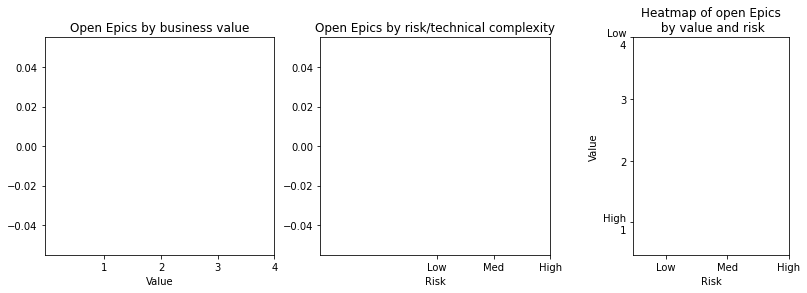

In [10]:
# defect velocity since mid 2019
StartWith = '2019-06-30'


df_val = df.copy()
df_val = df_val[df_val['BusinessValue'] > 0]
df_val['Risk'] += 1
df_val = df_val[df_val['Status'] == 'open'][['BusinessValue','Risk', 'Title']]
fig, ax = plt.subplots(1, 3, figsize=(14,4))
val_el = df_val.groupby(df_val['BusinessValue']).count()
risk_el = df_val.groupby(df_val['Risk']).count()
valrisk_el = df_val.groupby(['BusinessValue','Risk']).size()
valrisk_grid = valrisk_el.unstack().to_numpy()

ax[0].bar(val_el.index, val_el['Title'].values, width=0.6)
ax[0].set_title('Open Epics by business value')
ax[0].set_xlabel('Value')
ax[0].set_xticks([1,2,3,4])
#ax[1].set_xticklabels(['Low','Med','High'])


ax[1].bar(risk_el.index, risk_el['Title'].values, color='red', width=0.5)
ax[1].set_title('Open Epics by risk/technical complexity')
ax[1].set_xlabel('Risk')
ax[1].set_xticks([2,3,4])
ax[1].set_xticklabels(['Low','Med','High'])

ax[2].imshow(valrisk_grid, interpolation ='none', cmap='summer')
for (j,i),label in np.ndenumerate(valrisk_grid):
    if np.isnan(label):
        label = '0'
    else:
        label = int(label)
    ax[2].text(i,j,label,ha='center',va='center',fontsize=16)

ax[2].set_xlabel('Risk')
ax[2].set_xticks([0,1,2])
ax[2].set_xticklabels(['Low','Med','High'])
ax[2].set_ylabel('Value')
ax[2].set_yticks([0,1,2,3])
ax[2].set_yticklabels(['High\n 1',2,3,'Low\n 4'])
#ax[2].set_yticks([1,2,3,4,5])
ax[2].set_title('Heatmap of open Epics\n by value and risk')


### Initiatives, Epics, Stories

- Epics per Initiatives (not 
- Initiative completion by percentage
- Percentage of Epics completed
- Percentage of stories completed by sprint vs what was committed
- Defects per story
- End to end start to completion average

In [11]:
# Open vs closed epics

def f(Date):
    df_epics = df[df['Type'] == 'Epic']   
    df_epics = df_epics[df_epics['Created'] > Date]
    df_epics = df_epics[['Status', 'Type']]
    length = 20 * df_epics.index.size / 200
    df_epics.groupby(df_epics['Status']).count().plot(figsize=(length,2), kind='barh', legend=False)
    plt.title('Epics by completion \n created after ' + Date)

interact(f, Date=[('Jul 2019', '2019-06-30'), ('Oct 2019', '2019-09-30'), ('Jan 2020', '2019-12-31'), 
                  ('Feb 2020','2020-01-31'), ('Mar 2020', '2020-02-28'), ('Apr 2020','2020-03-31')])

interactive(children=(Dropdown(description='Date', options=(('Jul 2019', '2019-06-30'), ('Oct 2019', '2019-09-…

<function __main__.f(Date)>

In [12]:
# Todo: load from github/zenhub
SprintMap = [['Release 2 Sprint 1', 1], ['Release 2 Sprint 2', 2],
             ['Release 2 Sprint 3', 3], ['Release 2 Sprint 4', 4],
             ['Release 2 Sprint 5', 5], ['Release 2 Sprint 6', 6],
             ['Release 2 Sprint 7', 7], ['Release 2 Sprint 8', 8],
             ['Release 2 Sprint 9', 9], ['Release 2 Sprint 10', 10],
             ['March 2020 Sprint 11', 11], ['March 2020 Sprint 12', 12],
             ['April 2020 Sprint 13', 13], ['April 2020 Sprint 14', 14],
             ['May 2020 - Sprint 15', 15], ['May 2020 - Sprint 16', 16],
             ['May 2020 - Sprint 17', 17]]
              
DateMap = [('2019-09-26', '2019-10-15'), ('2019-10-16', '2019-10-24'),  # sprints 1,2
           ('2019-10-25', '2019-11-07'), ('2019-11-08', '2019-11-22'),
           ('2019-11-23', '2019-12-12'), ('2019-12-13', '2020-01-09'),  # sprints 5,6
           ('2020-01-10', '2020-01-16'), ('2020-01-17', '2020-02-05'),
           ('2020-02-06', '2020-02-13'), ('2020-02-14', '2020-02-27'),  # sprints 9,10
           ('2020-02-28', '2020-03-12'), ('2020-03-13', '2020-03-25'),
           ('2020-03-26', '2020-04-08'), ('2020-04-09', '2020-04-22'),  # sprints april
           ('2020-04-23', '2020-05-06'), ('2020-05-07', '2020-05-20'),
           ('2020-05-21', '2020-06-02')]  # sprint 17

def findSprint(date=None):
    if date is None:
        td = pd.Timestamp.today()
    else: td = date
    for i,dat in zip(range(100),DateMap):
        # end date later than today
        if pd.to_datetime(dat[1]) >= td:
            return i
    return -1  # not found
        

FromMap = [('now', 1)]
LookbackMap = [('this sprint', 0), ('last sprint', 1), ('last 2 sprints', 2), ('last 3 sprints', 3),
           ('last quarter', 12), ('release', 100)]

TypeMap = [('Issue', 0), ('Bug', 1), ('Epic',2), ('All', 3)]

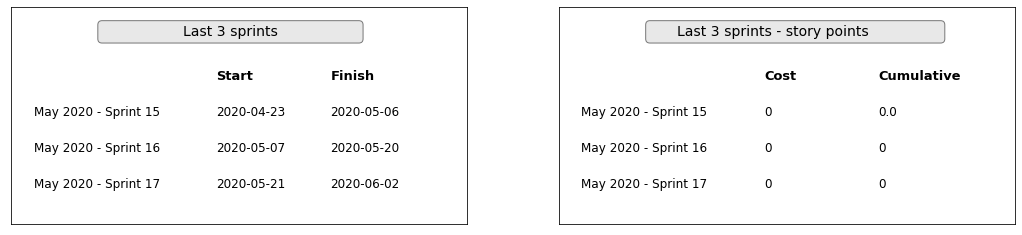

Box(children=(Dropdown(description='End:', options=(('now', 1),), value=1), Dropdown(description='Lookback:', …

Output()

In [13]:
# Burnup
StartDate = '2020-01-01' # start with sprint 7
Type = 2 # only Epics
pd.options.mode.chained_assignment = None

box_layoutB = Layout(display='flex', flex_flow='row', align_items='stretch', border='solid', width='100%')
dropdate = Dropdown(
    options=FromMap,
    value=1,
    description='End:',
)
droplookback = Dropdown(
    options=LookbackMap,
    value=1,
    description='Lookback:',
)
dropType = Dropdown(
    options=TypeMap,
    value=3,
    description='Type:',
)
showEpics = ToggleButton(
    value=False,
    description='Epics:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

boxB = Box(children=[dropdate, droplookback, dropType, showEpics], layout=box_layoutB)

i = findSprint()
df_points = df.copy()
# Assume estimate is at least 1 if nothing is specified
df_p1 = df[df['Milestone'] == SprintMap[i-2][0]][['Estimate','Type']].fillna(1)
df_p2 = df[df['Milestone'] == SprintMap[i-1][0]][['Estimate','Type']].fillna(1)
df_p3 = df[df['Milestone'] == SprintMap[i][0]][['Estimate','Type']].fillna(1)

df_p1['Estimate'].sum()

boxprops2 = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)
figout, axout = plt.subplots(1, 2, figsize=(18,4))
axout[0].set(xlim=(0,4), ylim=(0,3))
axout[0].get_yaxis().set_visible(False)
axout[0].get_xaxis().set_visible(False)

axout[0].text(0.8, 2.6, '                  Last 3 sprints                  ', fontsize=14, bbox=boxprops2)

axout[0].text(0.2, 0.5, SprintMap[i][0], fontsize=12)
axout[0].text(0.2, 1, SprintMap[i-1][0], fontsize=12)
axout[0].text(0.2, 1.5, SprintMap[i-2][0], fontsize=12) 
axout[0].text(1.8, 2, 'Start', fontsize=13, fontweight='bold')
axout[0].text(1.8, 0.5, DateMap[i][0], fontsize=12)
axout[0].text(1.8, 1, DateMap[i-1][0], fontsize=12)
axout[0].text(1.8, 1.5, DateMap[i-2][0], fontsize=12) 
axout[0].text(2.8, 2, 'Finish', fontsize=13, fontweight='bold')
axout[0].text(2.8, 0.5, DateMap[i][1], fontsize=12)
axout[0].text(2.8, 1, DateMap[i-1][1], fontsize=12)
axout[0].text(2.8, 1.5, DateMap[i-2][1], fontsize=12) 

axout[1].get_yaxis().set_visible(False)
axout[1].get_xaxis().set_visible(False)
axout[1].set(xlim=(0,4), ylim=(0,3))

axout[1].text(0.8, 2.6, '      Last 3 sprints - story points                ',
                fontsize=14, bbox=boxprops2)

axout[1].text(0.2, 0.5, SprintMap[i][0], fontsize=12)
axout[1].text(0.2, 1, SprintMap[i-1][0], fontsize=12)
axout[1].text(0.2, 1.5, SprintMap[i-2][0], fontsize=12) 
axout[1].text(1.8, 2, 'Cost', fontsize=13, fontweight='bold')
axout[1].text(1.8, 0.5, int(df_p2['Estimate'].sum()), fontsize=12)
axout[1].text(1.8, 1, int(df_p2['Estimate'].sum()), fontsize=12)
axout[1].text(1.8, 1.5, int(df_p1['Estimate'].sum()), fontsize=12) 
axout[1].text(2.8, 2, 'Cumulative', fontsize=13, fontweight='bold')
axout[1].text(2.8, 1.5, df_p1['Estimate'].sum(), fontsize=12)
axout[1].text(2.8, 1, int(df_p1['Estimate'].sum() + df_p2['Estimate'].sum()), fontsize=12)
axout[1].text(2.8, 0.5, int(df_p1['Estimate'].sum() + df_p2['Estimate'].sum() + df_p3['Estimate'].sum()),
              fontsize=12) 


def f_burnup(EndDate, Lookback, Type, ShowEpics):
    # print(EndDate, Lookback)
    if EndDate == 1:
        EndDate = pd.Timestamp.today()
    if Lookback == 100:
        Lookback = 180
        
    StartDate = pd.to_datetime(EndDate) - dt.timedelta(days=Lookback*14)
    #firstmile = findSprint(StartDate)
    lastmile = findSprint(EndDate)
    firstmile = lastmile - Lookback
    # print (StartDate)
    #df_burn = df.copy()
    
    #df_burn = df_burn[df_burn['Created'] > StartDate]
    # need: schedule for sprints in StartDate to Enddate
    milelist = SprintMap[firstmile:lastmile]
    milelist = [m[0] for m in milelist]
    # print (Lookback, firstmile, lastmile, milelist)

    df_burn = df.query('Milestone in @milelist').copy()
    
    # Turn NaT into a future date and round to the day
    df_burn['Closed'] = df_burn['Closed'].fillna(pd.Timestamp('2030-01-01')).dt.round('1d')

    # cut out items still open
    df_cut = df_burn[df_burn['Closed'] < '2030-01-01']
    
    # remove types we don't want to see
    if Type != 3:
        df_cut = df_cut[df_cut['Type'] == TypeMap[Type][0]]
  
    # cumulative sum of closed items
    s = pd.to_datetime(df_cut['Closed'])
    dfc = s.groupby(s.dt.floor('d')).size().reset_index(name='count').set_index('Closed')
    dfc['cumsum'] = dfc['count'].cumsum()
    
    dfd = df_burn[df_burn['Type'] == 'Epic'] #.set_index(['Closed']).sort_index()
    #dfd = dfd[dfd['Closed'] < '2030-01-01']
    dfd['Title'] = dfd['Title'].apply(lambda x: x[:50])

    #print (dfd['text'])
    # all open epics
    snum = 0
    try:
        snum = dfd.groupby(['Closed'])['Title'].size()[gitanalyzer.FarFuture]
    except Exception:
        pass
    print(snum)
    
    # join title of epics by closing time
    s_all = dfd.groupby(['Closed'])['Title'].apply(lambda x: '\n'.join(x))
    # all but the open epics
    s = s_all[:'2029-12-31']
    still_open = ''
    try:
        still_open = str(s_all[gitanalyzer.FarFuture])
    except Exception:
        pass
    
    proportional = 0.8
    if ShowEpics: proportional = 1
    fig, ax = plt.subplots(1, 1, figsize=(15 * proportional, 12 * proportional), squeeze=False)

    # ignore last value of epics still open
    ax[0,0].plot(dfc[:].index, dfc['cumsum'][:].values, lw=2, color='darkviolet')
    
    # catch cumsum array empty
    try:
        ax[0,0].plot(pd.Timestamp.now(), dfc['cumsum'][-1], lw=2, color='darkviolet')
    except:
        pass
    
    ax[0,0].fill_between(dfc[:].index, dfc['cumsum'][:].values-0.2, color='lightgrey')
    #ax[0,0].fill_between(ages, total_population)
    ax[0,0].set_title('Burn up, view by sprint', fontsize=14)

    # print (s)
    if ShowEpics:
        boxprops = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        boxprops3 = dict(boxstyle='round', facecolor='orange', alpha=0.5)
        i = 0
        k = 0
        lastdc = None
        for dc, row in s.iteritems():
            i += 1
            lastdc = dc
            i += 1
            if i % 2: j = -1.7
            else: j = 1.7
            #print(dfd.loc[date_closed,:])
            try:
                y_axis = dfc.loc[dc,:]['cumsum'] + j
            except:
                y_axis = k
                pass

            try:
                ax[0,0].plot(dc, y_axis, lw=0.1)
                ax[0,0].text(dc, y_axis,row, fontsize=8, zorder=10, bbox=boxprops)
                #print(dc, y_axis,row)
            except Exception as e:
                print (str(e))
                pass
        if len(still_open) > 0:
             
            ax[0,0].text(lastdc, 3, 'Epics still open', fontsize=10, zorder=10, fontweight='bold', bbox=boxprops3)
            ax[0,0].text(lastdc, 3 + 3*snum, still_open, fontsize=8, zorder=10, bbox=boxprops3)
                
bu_sprint = interactive_output(f_burnup, {'EndDate': dropdate, 'Lookback': droplookback, 
                                          'Type': dropType, 'ShowEpics': showEpics});


display(boxB, bu_sprint)

In [179]:
# Burndown release
StartDate = '2020-01-01' # start with sprint 7
Type = 2 # only Epics
pd.options.mode.chained_assignment = None

box_layoutBR = Layout(display='flex', flex_flow='row', align_items='stretch', border='solid', width='80%')

droprelease = Dropdown(
    options=ReleaseMap,
    value=1,
    description='Release:',
)
dropType = Dropdown(
    options=TypeMap,
    value=3,
    description='Type:',
)
showEpics = ToggleButton(
    value=False,
    description='Epics:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

boxBR = Box(children=[droprelease, dropType, showEpics], layout=box_layoutBR)

def f_burnupR(Release, Type, ShowEpics):
    
    release = ReleaseMap[Release][0]
    StartDate = pd.Timestamp(df_release.query('Title == @release')['Start'].to_numpy()[0])
    EndDate = df_release.query('Title == @release')['DesiredEnd'].to_numpy()[0]

    # filter all release items
    df_burnr = df[df['Release'] == release]
    
    # remove types we don't want to see
    if Type != 3:
        df_cutr = df_burnr[df_burnr['Type'] == TypeMap[Type][0]]
    else:
        df_cutr = df_burnr
        
    df_cutr = df_cutr.reset_index().set_index('Closed').sort_index()
    
    summing_ = []
    ic_first = None
    ic_second = None
    ic_third = None

    for ic in df_cutr.index:
        if ic_first is None: ic_first = ic
        elif ic_second is None: ic_second = ic
        elif ic_third is None: ic_third = ic
        s = df_burnr.query('Closed <= @ic' and 'Created <= @ic')['Estimate'].sum()
        scr = df_burnr.query('Created <= @ic')['Estimate'].to_numpy().shape[0]
        scl = df_burnr.query('Closed <= @ic')['Estimate'].to_numpy().shape[0]
        summing_.append([s, scr, scl])
    summing = np.asarray(summing_)
    
    df_cutr['cumsum'] = summing[:,0]
    df_cutr['new'] = summing[:,1]
    df_cutr['gone'] = summing[:,2]

    still_open_pts = df_burnr.query('Closed == @gitanalyzer.FarFuture')['Estimate'].sum()
    still_open = df_burnr.query('Closed == @gitanalyzer.FarFuture')['Estimate'].to_numpy().shape[0]
    cum_closed = summing[-1,0]
    # print (still_open)
        
    dfc = df_cutr.reset_index().query('Closed < @gitanalyzer.FarFuture').set_index('Closed')
    # print(dfc)

    proportional = 0.8
    if ShowEpics: proportional = 1
    fig, ax = plt.subplots(1, 1, figsize=(15 * proportional, 12 * proportional))

    print(len(dfc['cumsum']))
    # ignore last value of epics still open
    
    # print(dfc.index,'\n',dfc['cumsum'].values)
    
    #if len(dfc.index) < 3:
    #    ax.set_xticks(ticks=[])

    #ax.scatter(dfc[:].index, dfc['cumsum'][:].values, lw=2, color='darkviolet')

    ax.plot(dfc[:].index, dfc['cumsum'][:].values, lw=2, color='darkviolet', 
            zorder=1, label='cumulative by story points')
    ax.plot(dfc[:].index, dfc['new'][:].values-0.5, lw=2, color='blue', zorder=1, label='new items')
    ax.plot(dfc[:].index, dfc['gone'][:].values, lw=2, color='black', zorder=1, label='closed items')

    ax.legend()

    ax.fill_between(dfc[:].index, dfc['cumsum'][:].values-0.2, color='lightgrey')
   
    
    ax.set_title('Burn up per release for \"' + release + '\"', fontsize=14)
    
    boxprops = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    print (ic_first, ic_second, ic_third, StartDate)
    
    msg = 'Items still open:\n In story points: ' + str(int(still_open_pts)) + '\n By number: ' + str(still_open)
    
    if ic_first is not None:
        ax.text(ic_first, dfc['cumsum'][0], msg, fontsize=10, zorder=10, bbox=boxprops)
    if ic_second is not None:
        ax.text(ic_second, dfc['new'][0], 'Issues raised', fontsize=10, zorder=10, bbox=boxprops)
    if ic_third is not None:
        ax.text(ic_third, dfc['gone'][0], 'Issues gone', fontsize=10, zorder=10, bbox=boxprops)
    
    if ic_first is None:
        ic_first = StartDate
    
    ax.plot([ic_first, StartDate],[0,0], lw=2, ls='dashed')
    ax.plot([StartDate, pd.Timestamp(EndDate)],[0,summing[-1,0]], lw=2, ls='dashed', 
            color='gold', zorder=4, label='projection')
    ax.text(pd.Timestamp(EndDate), summing[-1,0], 'Release End', fontsize=10, zorder=10, bbox=boxprops)
    
    s = df_cutr.reset_index()[['Closed','Title']]
    s = s[s['Closed'] < gitanalyzer.FarFuture].set_index('Closed')
    still_open = ''

    
    # print (s)
    if ShowEpics:
        
        boxprops2 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        boxprops3 = dict(boxstyle='round', facecolor='orange', alpha=0.5)
        i = 0
        k = 0
        lastdc = None
        for dc, row in s.iterrows():
            # print(dc)
            row = row['Title'][:50]
            dc = pd.Timestamp(dc)
            i += 1
            lastdc = dc
            #print(dfd.loc[date_closed,:])
            try:
                y_axis = i*3 # dfc.loc[dc,i]['cumsum'] + j
            except:
                y_axis = k
                pass

            try:
                #ax.plot(dc, y_axis, lw=0.1)
                ax.text(dc, y_axis, str(row), fontsize=9, zorder=10, bbox=boxprops2)
                # print(dc, y_axis, str(row))
            except Exception as e:
                print (str(e))
                pass
        if len(still_open) > 0:
             
            ax.text(lastdc, 3, 'Epics still open', fontsize=10, zorder=10, fontweight='bold', bbox=boxprops3)
            ax.text(lastdc, 5, still_open, fontsize=8, zorder=10, bbox=boxprops3)
                
bu_sprintR = interactive_output(f_burnupR, {'Release': droprelease, 'Type': dropType, 'ShowEpics': showEpics});


display(boxBR, bu_sprintR)

Box(children=(Dropdown(description='Release:', index=1, options=(['Monitor April 2020 Release', 0], ['Monitor …

Output()

#### Next steps

- Aggregate data over smaller time spans such as **sprints** to get insights in velocity and completion rate
- Pull in data from travis and jenkins to include build process quality metrics


In [14]:


box_layoutS = Layout(display='flex', flex_flow='row', align_items='stretch', border='solid', width='45%')
dropsprint = Dropdown(
    options=SprintMap,
    value=14,
    description='Sprint:',
)
droptype = Dropdown(
    options=TypeMap,
    value=1,
    description='Type:',
)
boxS = Box(children=[dropsprint, droptype], layout=box_layoutS)




def f_sprint(Sprint, Type):
    # get all stories of given type closed in this sprint 
    if Type != 3:
        df_sprint = df[df['Type'] == TypeMap[Type][0]]
    else:
        df_sprint = df.copy()
    
    print (Sprint)
    # Sprint start is in the past - use closed date
    #if pd.Timestamp(DateMap[Sprint][0]) < dt.datetime.now():
    #    df_sprint = df_sprint[DateMap[Sprint][0]<= df_sprint['Closed']]
    #    df_sprint = df_sprint[df_sprint['Closed'] <= DateMap[Sprint][1]]
    #else: # use planned date
    df_sprint = df_sprint[df_sprint['Milestone'] == SprintMap[Sprint-1][0]]
    #print (df_sprint[['Title','Closed','Milestone']])
    df_sprint['Closed'] = df_sprint['Closed'].fillna(pd.Timestamp('2030-01-01'))
    
    df_sprint['Sized'] = pd.isna(df_sprint['Estimate'].values)   
    df_sizes = df_sprint.groupby(df_sprint['Sized']).count()    
    df_value = df_sprint.groupby(df_sprint['BusinessValue']).count()
    
    s = pd.to_datetime(df_sprint['Closed'])
    #dfc = df_sprint[df_sprint['Closed'] <= DateMap[Sprint-1][0]].reset_index().set_index(['Closed'])
    dfc = df_sprint[df_sprint['Closed'] < '2030-01-01'].reset_index().set_index(['Closed'])
    #print(dfc)
    
    #print (dfc)
    dfc = s.groupby(s.dt.floor('d')).size().reset_index(name='count').set_index('Closed')
    #print(dfc)
    dfc['cumsum'] = dfc['count'].cumsum()
    print(dfc)
    dfc['burndown'] = len(df_sprint.index) - dfc['cumsum']
    
    dfd = dfb[dfb['Closed'] < '2030-01-01'].set_index(['Closed'])
    
    #print(df_sprint[['Title', 'BusinessValue']])
    
    fig, ax = plt.subplots(1, 2, figsize=(14,2))
    ax[0].barh(df_sizes.index, df_sizes['Title'].values, height=0.3, color='green')
    #ax[0].set_title('Open Epics by business value')
    ax[0].set_ylabel('Sized Items')
    if len(df_sizes['Title']) == 0 or max(df_sizes['Title'].values) < 3:
        ax[0].set_xticks(np.arange(0,3))
    
    ax[0].set_yticks([0, 1])
    ax[0].set_yticklabels(['Sized','Unsized'])
    ax[0].set_title('Sized vs unsized items')
    
    ax[1].barh(df_value.index, df_value['Risk'].values, height=0.4, color='blue')
    #ax[1].set_ylabel('Value per Sprint')
    if len(df_value['Risk']) == 0 or max(df_value['Risk'].values) < 3:
        ax[1].set_xticks(np.arange(0,3))
    ax[1].set_yticks([0, 1, 2, 3, 4])  
    ax[1].set_yticklabels(['Unknown', 'High', 2, 3, 'Low'])
    ax[1].set_title('Value per sprint')

    fig2, ax2 = plt.subplots(1, 2, figsize=(20, 5))
    # ignore last value of epics still open
    ax2[0].plot(dfc[:-1].index, dfc['cumsum'][:-1].values, lw=2, color='darkviolet')
    ax2[0].set_title('Burn up: Type ' + TypeMap[Type][0] + ', Sprint ' + SprintMap[Sprint-1][0], fontsize=14)
    ax2[1].plot(dfc[:-1].index,  dfc['burndown'][:-1], lw=2, color='darkviolet')
    ax2[1].set_title('Burn down: Type ' + TypeMap[Type][0] + ', Sprint ' + SprintMap[Sprint-1][0], fontsize=14)

ws_sprint = interactive_output(f_sprint, {'Sprint': dropsprint, 'Type': droptype});
display(boxS, ws_sprint)

Box(children=(Dropdown(description='Sprint:', index=13, options=(['Release 2 Sprint 1', 1], ['Release 2 Sprint…

Output()

In [18]:
# select only Epics
Type = 2
df_sprints = []
df_sizes = []
df_values = []
for i,sprint,date in zip(range(len(SprintMap)),SprintMap, DateMap):
            
    if pd.Timestamp(DateMap[i][0]) < dt.datetime.now():
        df_spr = df[DateMap[i][0]<= df['Closed']]
        df_spr = df_spr[df_spr['Closed'] <= DateMap[i][1]]
    else: # use planned date
        df_spr = df_spr[df_spr['Milestone'] == SprintMap[i][0]]
    df_spr['Sized'] = pd.isna(df_spr['Estimate'].values)
    
    # project Type
    if Type != 3:
        df_spr = df_spr[df_spr['Type'] == TypeMap[Type][0]]
    
    df_sprints.append(df_spr)
    df_siz = df_spr.groupby(df_spr['Sized']).count()  
    df_sizes.append(df_siz)
    df_val = df_spr.groupby(df_spr['Closed'].dt.day)['Estimate'].cumsum()
    df_values.append(df_val)
    
df_epics = df_values[12]
#df_epics = df_epics[df_epics['Type'] == 'Epic']
df_epics
    
#fig, ax = plt.subplots(1, 1, figsize=(20, 30))
#for i in range(9, len(SprintMap)):
#    ax.bar(df_values[i].index + 10 * i, df_values[i]['Risk'].values, width=0.3, color='blue')
  

935       2.69
810       2.69
564       2.69
497       5.38
455       5.38
117       8.07
79       10.76
36        2.69
2025      5.38
2018      8.07
2017     10.76
2014     13.45
1976     13.45
1920     16.14
1919     18.83
1907     16.14
1761     18.83
1626     21.52
1559     24.21
1502     26.90
1493     29.59
1449     32.28
1406     34.97
1347     37.66
1338     40.35
1225     43.04
1205     45.73
1161     48.42
1056     51.11
1048     53.80
1047     56.49
1019     59.18
997      61.87
981      64.56
779      67.25
722      69.94
718      72.63
696      75.32
691      78.01
688      80.70
687      83.39
684      86.08
683      88.77
682      91.46
676      94.15
675      96.84
672      99.53
670     102.22
662     104.91
535     107.60
519     110.29
513     112.98
315     115.67
312     118.36
297     121.05
258     123.74
256     126.43
244     129.12
239     131.81
Name: Estimate, dtype: float64

#### Longer term considerations

##### Should we continue with a local Jupyter notebook or invest in a dashboard ?

Maybe we make use of Jupyter and quick prototyping until we have 80% of the metrics in place we need. 